In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import os
from PIL import Image
from os import listdir
# from ResidualAttentionNetwork import ResidualAttentionNetwork
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.callbacks import Callback
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
!unzip /content/drive/MyDrive/GR5242/gr5242_project/train_data_generated_2.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data_generated_2/input/37.png  
  inflating: train_data_generated_2/input/370.png  
  inflating: train_data_generated_2/input/3700.png  
  inflating: train_data_generated_2/input/3701.png  
  inflating: train_data_generated_2/input/3702.png  
  inflating: train_data_generated_2/input/3703.png  
  inflating: train_data_generated_2/input/3704.png  
  inflating: train_data_generated_2/input/3705.png  
  inflating: train_data_generated_2/input/3706.png  
  inflating: train_data_generated_2/input/3707.png  
  inflating: train_data_generated_2/input/3708.png  
  inflating: train_data_generated_2/input/3709.png  
  inflating: train_data_generated_2/input/371.png  
  inflating: train_data_generated_2/input/3710.png  
  inflating: train_data_generated_2/input/3711.png  
  inflating: train_data_generated_2/input/3712.png  
  inflating: train_data_generated_2/input/3713.png  
  inflating: train_data_generated_2/input/3714.png  

In [4]:
!unzip /content/drive/MyDrive/GR5242/gr5242_project/train_data_generated.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_data_generated/label/5499.png  
  inflating: train_data_generated/label/55.png  
  inflating: train_data_generated/label/550.png  
  inflating: train_data_generated/label/5500.png  
  inflating: train_data_generated/label/5501.png  
  inflating: train_data_generated/label/5502.png  
  inflating: train_data_generated/label/5503.png  
  inflating: train_data_generated/label/5504.png  
  inflating: train_data_generated/label/5505.png  
  inflating: train_data_generated/label/5506.png  
  inflating: train_data_generated/label/5507.png  
  inflating: train_data_generated/label/5508.png  
  inflating: train_data_generated/label/5509.png  
  inflating: train_data_generated/label/551.png  
  inflating: train_data_generated/label/5510.png  
  inflating: train_data_generated/label/5511.png  
  inflating: train_data_generated/label/5512.png  
  inflating: train_data_generated/label/5513.png  
  inflating: train_data_generated/l

In [5]:
os.getcwd()

'/content'

In [6]:
input_dir = '/content/train_data_generated_2/input'
label_dir = '/content/train_data_generated_2/label'

In [7]:
input_dir_2 = '/content/train_data_generated/input'
label_dir_2 = '/content/train_data_generated/label'

In [8]:
image_list1 = []
for filename in os.listdir(input_dir)[:1500]:
    im=cv2.imread(input_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list1.append(im)

In [9]:
len(image_list1)

1500

In [10]:
image_list2 = []
for filename in os.listdir(label_dir)[:1500]:
    im=cv2.imread(label_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list2.append(im)

In [11]:
len(image_list2)

1500

In [12]:
image_list5 = []
for filename in os.listdir(input_dir)[2000:2200]:
    im=cv2.imread(input_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list5.append(im)

image_list6 = []
for filename in os.listdir(label_dir)[2000:2200]:
    im=cv2.imread(label_dir + '/' +filename)
    im = tf.image.resize(im,[64,64])
    image_list6.append(im)

In [13]:
len(image_list5),len(image_list6)

(200, 200)

In [14]:
X_train = np.asarray(image_list1,dtype=np.float32)
y_train = np.asarray(image_list2,dtype=np.float32)
x_test = np.asarray(image_list5,dtype=np.float32)
y_test = np.asarray(image_list6,dtype=np.float32)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,BatchNormalization,Dropout
import numpy as np
import tensorflow as tf

# Loss functtion
def ssim_loss(y_true, y_pred):
  return 255-tf.reduce_mean(tf.image.ssim(y_true, y_pred, 255.0))

# Model: Input Image size: 32X32X1 output Image size: 32X32X1 
# check model.summary
model = Sequential()
model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=(64,64,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,  (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64,  (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128,  (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,  (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,  (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,  (5, 5),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,  (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,  (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,  (3, 3),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,  (1, 1),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,  (1, 1),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,  (1, 1),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,  (1, 1),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,  (1, 1),
                 activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,  (1, 1),
                 activation='relu',padding='same'))
model.add(Conv2D(32,  (1, 1),
                 activation='relu',padding='same'))
model.add(Conv2D(3,  (1, 1),
                 activation='relu',padding='same'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        3

In [20]:
model.compile(optimizer='adam', loss='MSE')

In [17]:
import os
os.chdir('/content/drive/MyDrive/GR5242/64x64 deeper output/')

In [18]:
simple_img = np.expand_dims(cv2.imread(input_dir + '/' +'3762.png').astype('int32'), axis=0)
mid_img = np.expand_dims(cv2.imread(input_dir + '/' +'2870.png').astype('int32'), axis=0)
hard_img = np.expand_dims(cv2.imread(input_dir + '/' +'3950.png').astype('int32'), axis=0)

Epoch 1/5
188/188 [==============================] - 25s 85ms/step - loss: 52593.4745
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 1373.6626
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 1170.2978
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 1198.3381
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 1295.5608


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 79ms/step - loss: 1039.9337
Epoch 2/5
188/188 [==============================] - 15s 79ms/step - loss: 935.5411
Epoch 3/5
188/188 [==============================] - 15s 79ms/step - loss: 825.9976
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 743.1386
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 740.6013


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 787.4790
Epoch 2/5
188/188 [==============================] - 15s 79ms/step - loss: 579.7249
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 506.3790
Epoch 4/5
188/188 [==============================] - 15s 79ms/step - loss: 420.1249
Epoch 5/5
188/188 [==============================] - 15s 79ms/step - loss: 357.4608


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 295.1285
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 275.6251
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 258.6198
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 241.1617
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 232.8719


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 214.2594
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 204.0527
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 220.7414
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 216.7019
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 192.6300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


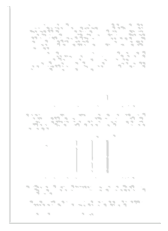

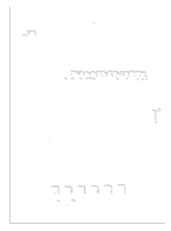

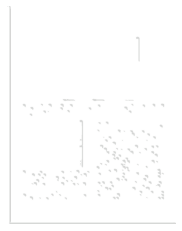

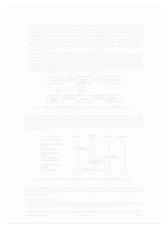

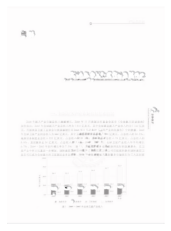

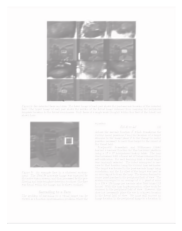

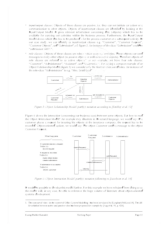

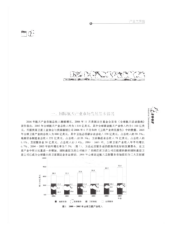

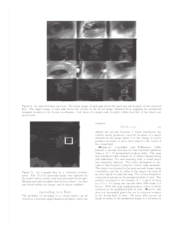

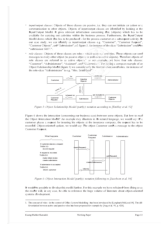

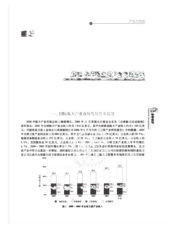

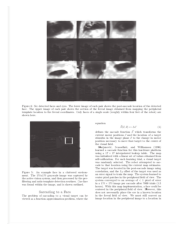

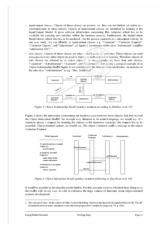

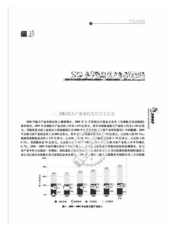

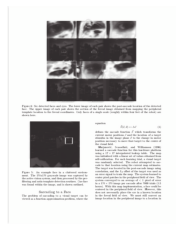

In [21]:
history_list = []
for i in range(5,30,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_21th_1_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_21th_1_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32')) 

Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 190.6025
Epoch 2/5
188/188 [==============================] - 15s 79ms/step - loss: 181.5252
Epoch 3/5
188/188 [==============================] - 15s 79ms/step - loss: 180.7159
Epoch 4/5
188/188 [==============================] - 15s 79ms/step - loss: 176.3059
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 175.6328


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 79ms/step - loss: 167.6753
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 164.6440
Epoch 3/5
188/188 [==============================] - 15s 79ms/step - loss: 164.7462
Epoch 4/5
188/188 [==============================] - 15s 79ms/step - loss: 162.5700
Epoch 5/5
188/188 [==============================] - 15s 79ms/step - loss: 167.6736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 79ms/step - loss: 165.4722
Epoch 2/5
188/188 [==============================] - 15s 79ms/step - loss: 161.4079
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 159.2741
Epoch 4/5
188/188 [==============================] - 15s 79ms/step - loss: 155.8869
Epoch 5/5
188/188 [==============================] - 15s 79ms/step - loss: 155.3505


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


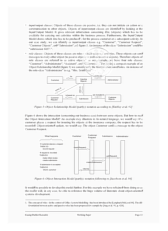

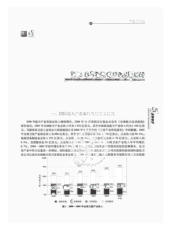

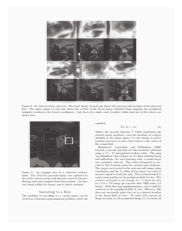

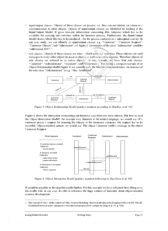

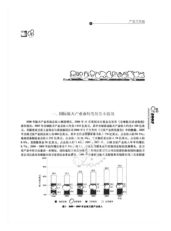

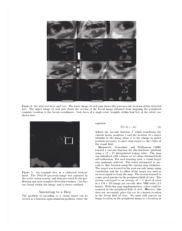

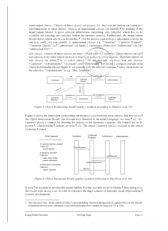

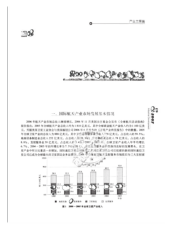

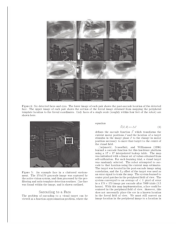

In [22]:
for i in range(35,50,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_21th_1_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_21th_1_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32')) 

Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 161.3867
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 161.1822
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 154.2585
Epoch 4/5
188/188 [==============================] - 15s 79ms/step - loss: 153.4635
Epoch 5/5
188/188 [==============================] - 15s 79ms/step - loss: 167.4037


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 158.6099
Epoch 2/5
188/188 [==============================] - 15s 79ms/step - loss: 152.6816
Epoch 3/5
188/188 [==============================] - 15s 79ms/step - loss: 156.3458
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 157.8029
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 149.4828


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 154.4395
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 148.8176
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 163.1010
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 149.7148
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 145.1282


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 80ms/step - loss: 147.6923
Epoch 2/5
188/188 [==============================] - 15s 80ms/step - loss: 145.4163
Epoch 3/5
188/188 [==============================] - 15s 79ms/step - loss: 145.4363
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 143.8812
Epoch 5/5
188/188 [==============================] - 15s 79ms/step - loss: 150.9472


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch 1/5
188/188 [==============================] - 15s 79ms/step - loss: 148.7024
Epoch 2/5
188/188 [==============================] - 15s 79ms/step - loss: 140.7884
Epoch 3/5
188/188 [==============================] - 15s 80ms/step - loss: 143.9374
Epoch 4/5
188/188 [==============================] - 15s 80ms/step - loss: 143.2271
Epoch 5/5
188/188 [==============================] - 15s 80ms/step - loss: 143.7664


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


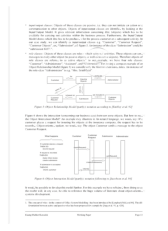

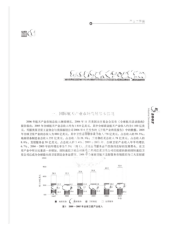

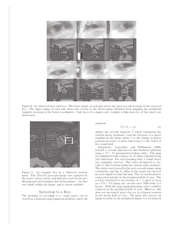

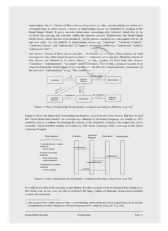

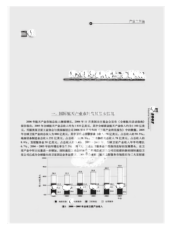

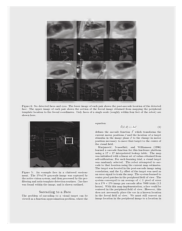

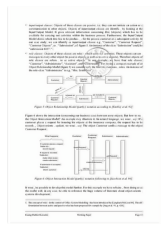

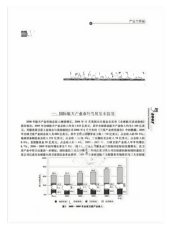

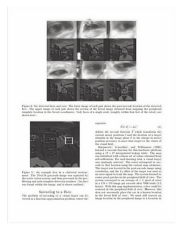

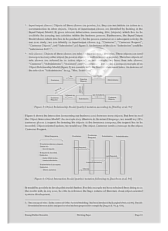

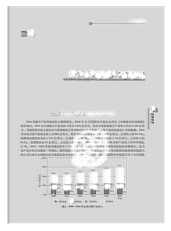

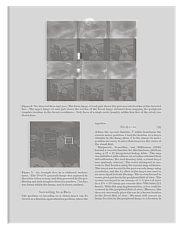

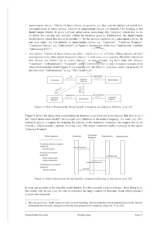

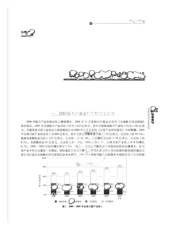

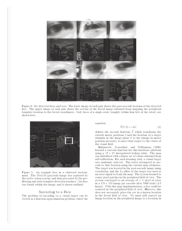

In [23]:
for i in range(55,80,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_21th_1_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_21th_1_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32')) 

In [ ]:
for i in range(55,80,5):
  history=model.fit(X_train,y_train,batch_size=8,epochs=5)
  model.save('model_21th_1_'+str(i)+'epoch.h5')
  simple_pred =  model.predict(simple_img)
  mid_pred =  model.predict(mid_img)
  hard_pred =  model.predict(hard_img)
  plt.figure()
  plt.imshow(simple_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(mid_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  plt.figure()
  plt.imshow(hard_pred[0,:,:,:].astype('int32'))
  plt.axis('off')

  cv2.imwrite('model_21th_1_simple_'+str(i)+'epoch.png', simple_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_mid_'+str(i)+'epoch.png', mid_pred[0,:,:,:].astype('int32')) 
  cv2.imwrite('model_21th_1_hard_'+str(i)+'epoch.png', hard_pred[0,:,:,:].astype('int32'))